<a href="https://colab.research.google.com/github/Reichidad/Machine-Learning-2020-Spring-Class/blob/assignment03/assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 03. Visualization of Gradient Descent algorithm based on Linear Regression problem - 20145822 김영현
---
## 1. Input points

## 2. Linear regression result

## 3. Plot the energy surface

## 4. Plot the gradient descent path on the energy surface

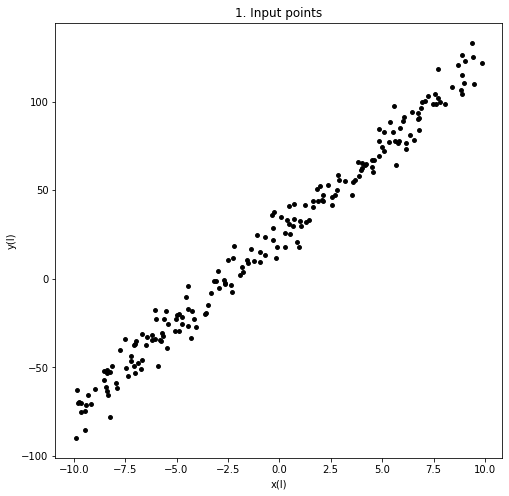

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Input data file read
path = "/content/drive/My Drive/Colab Notebooks/data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

# 1. Input points
# plot a set of points that are loaded from 'data.csv' file (in black color)
plt.figure(1, figsize=(8,8))
plt.title("1. Input points")
plt.xlabel("x(l)")
plt.ylabel("y(l)")
plt.scatter(x_data, y_data, s=15, c='k', label="data.csv")
plt.legend()

# 2. Linear regression result
# plot a set of points that are loaded from 'data.csv' file (in black color)
# plot a straight line obtained by the optimal linear regression
# based on the given set of points (in red color)

plt.show()